# 데이터의 시각화
1. 라인, 바, 산점도, 히스토그램 그래프 시각화

In [2]:
import matplotlib.pyplot as plt

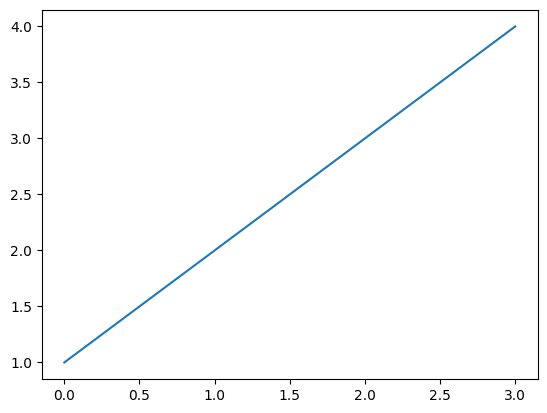

In [3]:
# 라인 그래프 
# plt.plot([]) -> 리스트의 값이 하나만 존재하면 y축의 값으로 지정
# plt.plot([], []) -> 앞의 리스트의 값은 x축, 뒤의 리스트의 값은 y축이 된다. 
plt.plot([1,2,3,4])
plt.show()

## subplot()
1. 한 영역에 그래프를 여러 개 그려주기 위한 함수
2. subplot(행의 개수, 열의 개수, 위치)

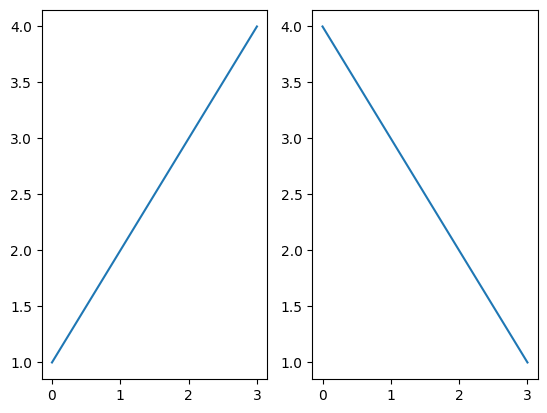

In [4]:
plt.subplot(1, 2, 1)
plt.plot([1,2,3,4])
plt.subplot(1, 2, 2)
plt.plot([4,3,2,1])
plt.show()

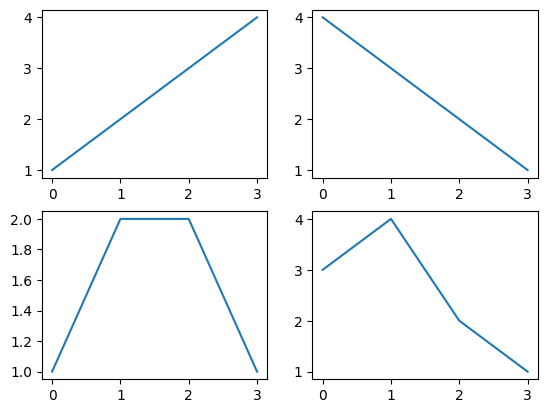

In [5]:
fig, axes = plt.subplots(2, 2)
axes[0][0].plot([1,2,3,4])
axes[0][1].plot([4,3,2,1])
axes[1][0].plot([1,2,2,1])
axes[1][1].plot([3,4,2,1])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)

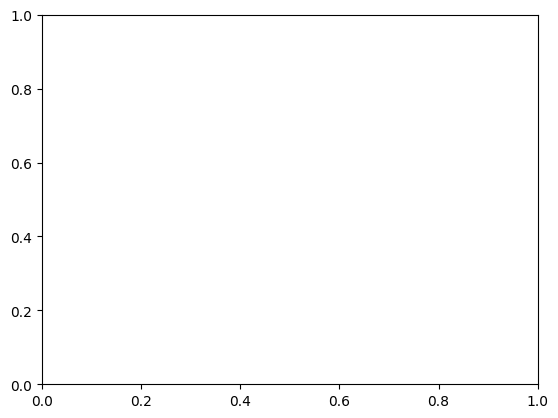

In [6]:
x = [1,2,3]
y = [4,3,2,1]
plt.plot(x, y)
plt.show()

In [ ]:
# x축의 이름과 y축의 이름, 그래프의 이름 지정 
plt.plot([1,2,3,4])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('title')
plt.show()

In [ ]:
# 범례 추가
plt.plot([1,2,3,4], label = 'acending')
plt.plot([4,3,2,1], label = 'descending')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# 히스토그램 -> 데이터의 개수를 표현하는 바 그래프 
data = [1, 2, 2, 2, 3, 3, 4, 4, 4, 4]
plt.hist(data)
plt.show()

In [ ]:
# finance-datareader 라이브러리 설치 
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
kospi = fdr.DataReader('ks11', '2019')

In [ ]:
kospi

In [ ]:
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AplleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:

# 그래프 사이즈를 조절
plt.figure(figsize=(14, 6))
# grid 추가
plt.grid(True, axis='y')
plt.plot(kospi['Close'].head(20), marker='o')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.show()

In [ ]:
mean_kospi_2020 = kospi.loc['2020'].resample('MS').mean()
mean_kospi_2020

In [ ]:
# x축은 'XXXX년XX월' 표시
mean_kospi_2020.index[0].strftime('%Y년%m월')


In [ ]:

x = []
for i in mean_kospi_2020.index:
    x.append(i.strftime('%Y년%m월'))

x

In [ ]:
list(map(lambda x : x.strftime('%Y년%m월'), mean_kospi_2020.index))

In [ ]:
plt.barh(x, mean_kospi_2020['Volume'])
# 지수표현식을 일반 표현식으로 변경
plt.ticklabel_format(axis='x', style='plain')
plt.show()

In [ ]:
# kospi에서 변동률 파생변수 
# 변동률 = (종가-시가) / 시가 * 100
kospi['변동률'] = (kospi['Close'] - kospi['Open']) / kospi['Open'] * 100
kospi.head()

In [ ]:
# 음수를 표시
plt.rc("axes", unicode_minus= False)
plt.grid()
plt.hist(kospi['변동률'], bins=20)
plt.show()

### candle stick

In [ ]:
!pip install mplfinance

In [ ]:
import mplfinance as mpf

In [ ]:
mpf.plot(data = kospi.loc['2020-12'], type='candle')

In [ ]:
marketcolor = mpf.make_marketcolors(
    up = 'r', 
    down = 'b', 
    edge = 'inherit', 
    wick = 'inherit'
)

style = mpf.make_mpf_style(
    base_mpf_style = 'default', 
    marketcolors = marketcolor, 
    gridaxis = 'both', 
    y_on_right = False
)

mpf.plot(data = kospi.loc['2020-12'], type='candle', style = style)

# 문제
1. test_csv 폴더 안에 있는 오프라인.csv을 로드 
2. 컬럼의 이름을 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']으로 변경
3. 기준년월을 시계열 데이터로 변경
4. index를 기준년월로 변경
5. 온라인.csv 파일도 위의 작업을 반복한다. 
6. 온라인에 업종 컬럼을 추가하여 '온라인'으로 값을 지정 
7. 두개의 데이터프레임을 유니언 결합
8. 기준년월, 업종 별 총 이용금액의 합계를 라인그래프로 시각화

In [8]:
import pandas as pd

In [9]:
offline = pd.read_csv("../test_csv/오프라인.csv", encoding='euc-kr')
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [10]:
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.0


In [11]:
# 기준년월 시계열 변경
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [12]:
# 기준년월을 인덱스로 변경
offline.set_index('기준년월', inplace=True)

In [13]:
online = pd.read_csv('../test_csv/온라인.csv')
online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [14]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
online.head()

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [15]:
# 업종이라는 파생변수 생성 ( 값은 '온라인' )
online['업종'] = '온라인'

In [16]:
online.head(2)

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인


In [17]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format = '%Y%m')
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    651 non-null    datetime64[ns]
 1   성별      651 non-null    int64         
 2   연령대     651 non-null    int64         
 3   총이용건수   651 non-null    int64         
 4   총이용금액   651 non-null    int64         
 5   업종      651 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 30.6+ KB


In [18]:
online.set_index('기준년월', inplace=True)

In [19]:
# 두개의 데이터프레임을 유니언 결합
data = pd.concat([offline, online], axis=0)

In [20]:
# 인덱스를 기준으로 오름차순 정렬
data.sort_index(inplace=True)

In [21]:
pivot_data =  pd.pivot_table(
    data, 
    index = data.index, 
    columns = '업종', 
    values = '총이용금액', 
    aggfunc= 'sum'
)

In [22]:
plt.rc('font', family='Malgun Gothic')

<AxesSubplot: xlabel='기준년월'>

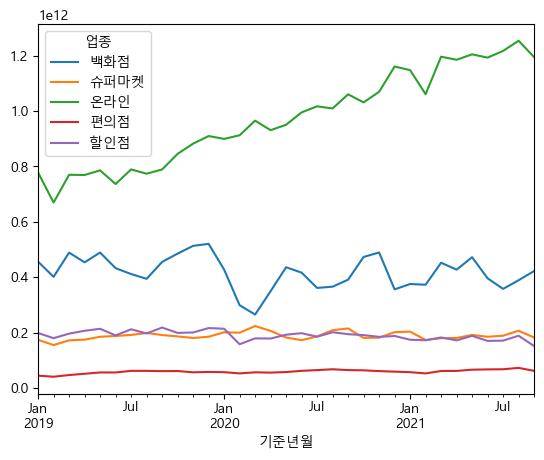

In [23]:
pivot_data.plot()

In [24]:
group_data = data.groupby([data.index, '업종']).sum()[['총이용금액']]

<AxesSubplot: xlabel='기준년월'>

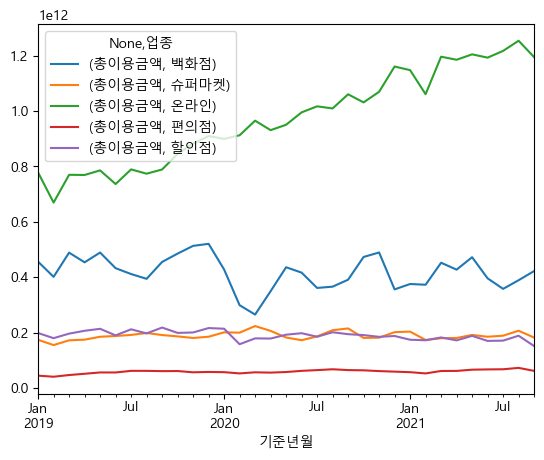

In [25]:
group_data.unstack().plot()

1. 결합된 데이터프레임에서 성별을 1은 '남자' 2는 '여자' 변경
2. 온라인 업종의 남, 여의의 카드매출 월별로 어떻게 차이가 나는가?를 시각화 하여 표시 

In [26]:
# 성별을 1은 남자 2는 여자로 변경
data.loc[data['성별'] == 1, '성별'] = '남자'
data.loc[data['성별'] == 2, '성별'] = '여자'
data['성별'].value_counts()

여자    1661
남자    1638
Name: 성별, dtype: int64

In [27]:
data['성별'].isna().sum()

0

In [29]:
online_data = data.loc[data['업종'] == '온라인']

<AxesSubplot: xlabel='기준년월'>

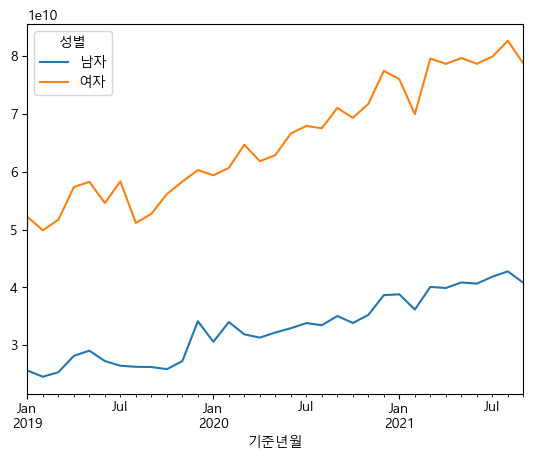

In [32]:
pd.pivot_table(
    online_data, 
    index = online_data.index, 
    columns='성별', 
    values = '총이용금액', 
    aggfunc= 'mean'
).plot()